In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

18.65990876178398 74.62204826852329
71.3185110866678 -131.39430249758357
-42.19428452129725 123.97500441571327
20.647463410917197 -67.38660059840586
-5.196366527174305 -102.16506876436172
-41.0826603916234 100.7415419928289
67.63692099252825 -18.049435708415444
32.196692259957246 -177.98093398999382
64.36619228855659 -35.106072304923345
50.291255355446964 15.24408887129431
-51.56603884700696 64.01157032217185
7.557110623574886 123.64739583011288
51.680816753969225 88.19619799721465
15.68844844190049 -144.6231635965149
20.19017718741867 111.39276053717407
29.620483154464637 8.437429204509328
46.220545847660674 131.5032482114106
-19.762060543413654 -39.40665091767053
-7.8769646116158185 -158.4609996889046
-54.120422465358054 94.39176657718127
-2.6093164262587436 -78.33092377748119
-60.346771461663764 -120.56345366924407
-21.215210683297997 76.2761501715442
70.49645081571484 160.67100376261703
-39.20895804020553 -46.86593258840895
-20.18891160282783 101.15938987276093
52.42180444530078 54

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
#import the requests library.
import requests

#import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e7a2780222784b6ca22894e39cd6cd


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b2e7a2780222784b6ca22894e39cd6cd&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 85.95,
  'feels_like': 94.51,
  'temp_min': 81.95,
  'temp_max': 88.39,
  'pressure': 1008,
  'humidity': 69},
 'visibility': 10000,
 'wind': {'speed': 15.99, 'deg': 0, 'gust': 0},
 'clouds': {'all': 100},
 'dt': 1658777623,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1658741380,
  'sunset': 1658794293},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Get the JSON data.
boston_data = city_weather.json()

In [14]:
boston_data['sys']['country']

'US'

In [15]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 88.39 69 100 15.99


In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 7, 25, 19, 33, 43)

In [17]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-07-25 19:33:43'

In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(20)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | shrigonda
Processing Record 2 of Set 1 | tuktoyaktuk
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | isabela
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | kopidlno
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | san pablo
Processing Record 13 of Set 1 | ulagan
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | qiongshan
Processing Record 16 of Set 1 | nalut
Processing Record 17 of Set 1 | baoshan
Processing Record 18 of Set 1 | linhares
Processing Record 19 of Set 1 | faanui
Processing Record 20 of Set 1 | sucua
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | grand river south east
City not found. Skipping...
Processi

Processing Record 40 of Set 4 | bongandanga
Processing Record 41 of Set 4 | vitim
Processing Record 42 of Set 4 | codrington
Processing Record 43 of Set 4 | villazon
Processing Record 44 of Set 4 | alice springs
Processing Record 45 of Set 4 | sinjai
Processing Record 46 of Set 4 | moose factory
Processing Record 47 of Set 4 | oleggio
Processing Record 48 of Set 4 | hirara
Processing Record 49 of Set 4 | challans
Processing Record 50 of Set 4 | saint-francois
Processing Record 1 of Set 5 | maragogi
Processing Record 2 of Set 5 | mount isa
Processing Record 3 of Set 5 | severo-kurilsk
Processing Record 4 of Set 5 | lovozero
Processing Record 5 of Set 5 | san patricio
Processing Record 6 of Set 5 | mazagao
Processing Record 7 of Set 5 | necochea
Processing Record 8 of Set 5 | comodoro rivadavia
Processing Record 9 of Set 5 | whitehorse
Processing Record 10 of Set 5 | isangel
Processing Record 11 of Set 5 | asau
Processing Record 12 of Set 5 | oskaloosa
Processing Record 13 of Set 5 | col

Processing Record 30 of Set 8 | mindyak
Processing Record 31 of Set 8 | ambulu
Processing Record 32 of Set 8 | berdigestyakh
Processing Record 33 of Set 8 | sabla
Processing Record 34 of Set 8 | coihaique
Processing Record 35 of Set 8 | bilibino
Processing Record 36 of Set 8 | souillac
Processing Record 37 of Set 8 | elizabeth city
Processing Record 38 of Set 8 | ostrovnoy
Processing Record 39 of Set 8 | falealupo
City not found. Skipping...
Processing Record 40 of Set 8 | pangnirtung
Processing Record 41 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 42 of Set 8 | patrocinio
Processing Record 43 of Set 8 | caravelas
Processing Record 44 of Set 8 | barcelos
Processing Record 45 of Set 8 | kutum
Processing Record 46 of Set 8 | kieta
Processing Record 47 of Set 8 | diu
Processing Record 48 of Set 8 | rio grande
Processing Record 49 of Set 8 | finnsnes
Processing Record 50 of Set 8 | kavieng
Processing Record 1 of Set 9 | duluth
Processing Record 2 of Set 9 | up

Processing Record 18 of Set 12 | letterkenny
Processing Record 19 of Set 12 | tawkar
City not found. Skipping...
Processing Record 20 of Set 12 | gwadar
Processing Record 21 of Set 12 | melnikovo
Processing Record 22 of Set 12 | jalu
Processing Record 23 of Set 12 | skjervoy
Processing Record 24 of Set 12 | matara
Processing Record 25 of Set 12 | spas-demensk
Processing Record 26 of Set 12 | sobolevo
Processing Record 27 of Set 12 | olinda
Processing Record 28 of Set 12 | sataua
City not found. Skipping...
Processing Record 29 of Set 12 | syamzha
Processing Record 30 of Set 12 | nizhniy baskunchak
Processing Record 31 of Set 12 | lima
Processing Record 32 of Set 12 | alcains
Processing Record 33 of Set 12 | helong
Processing Record 34 of Set 12 | half moon bay
Processing Record 35 of Set 12 | chuguyevka
Processing Record 36 of Set 12 | grand centre
City not found. Skipping...
Processing Record 37 of Set 12 | muroto
Processing Record 38 of Set 12 | waingapu
Processing Record 39 of Set 1

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shrigonda,18.6167,74.6833,74.08,84,100,10.63,IN,2022-07-25 19:39:45
1,Tuktoyaktuk,69.4541,-133.0374,53.60,76,75,14.97,CA,2022-07-25 19:39:46
2,Esperance,-33.8667,121.9000,51.15,59,28,16.62,AU,2022-07-25 19:39:46
3,Isabela,6.7085,121.9711,77.54,85,98,3.51,PH,2022-07-25 19:39:46
4,Puerto Ayora,-0.7393,-90.3518,80.56,89,66,8.99,EC,2022-07-25 19:39:47
5,Busselton,-33.6500,115.3333,62.67,72,75,23.13,AU,2022-07-25 19:38:23
6,Husavik,66.0449,-17.3389,48.31,83,100,4.21,IS,2022-07-25 19:39:47
7,Kapaa,22.0752,-159.3190,80.92,69,20,17.27,US,2022-07-25 19:39:48
8,Tasiilaq,65.6145,-37.6368,48.36,87,100,2.66,GL,2022-07-25 19:38:22
9,Kopidlno,50.3308,15.2703,82.44,55,89,5.95,CZ,2022-07-25 19:39:48


In [21]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shrigonda,IN,2022-07-25 19:39:45,18.6167,74.6833,74.08,84,100,10.63
1,Tuktoyaktuk,CA,2022-07-25 19:39:46,69.4541,-133.0374,53.60,76,75,14.97
2,Esperance,AU,2022-07-25 19:39:46,-33.8667,121.9000,51.15,59,28,16.62
3,Isabela,PH,2022-07-25 19:39:46,6.7085,121.9711,77.54,85,98,3.51
4,Puerto Ayora,EC,2022-07-25 19:39:47,-0.7393,-90.3518,80.56,89,66,8.99


In [22]:
# Create the output file (csv).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658778411.8232746

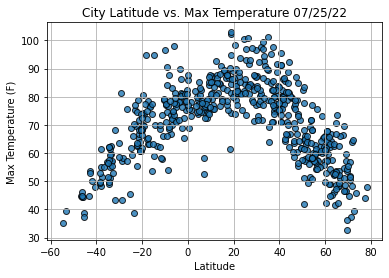

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

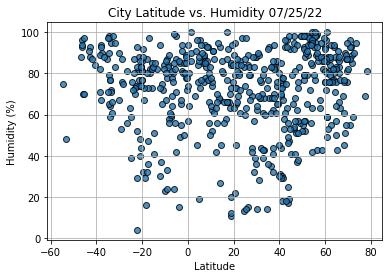

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

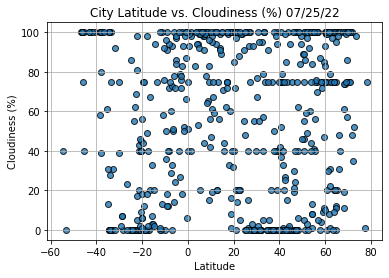

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

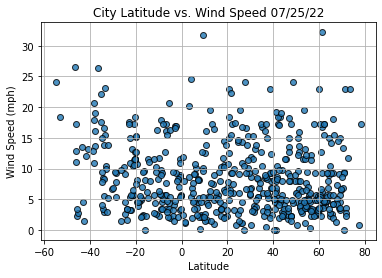

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [37]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2022-07-25 19:38:26
Lat                       19.7297
Lng                       -155.09
Max Temp                    89.28
Humidity                       76
Cloudiness                    100
Wind Speed                   6.91
Name: 13, dtype: object

In [39]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shrigonda,IN,2022-07-25 19:39:45,18.6167,74.6833,74.08,84,100,10.63
1,Tuktoyaktuk,CA,2022-07-25 19:39:46,69.4541,-133.0374,53.60,76,75,14.97
3,Isabela,PH,2022-07-25 19:39:46,6.7085,121.9711,77.54,85,98,3.51
6,Husavik,IS,2022-07-25 19:39:47,66.0449,-17.3389,48.31,83,100,4.21
7,Kapaa,US,2022-07-25 19:39:48,22.0752,-159.3190,80.92,69,20,17.27


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

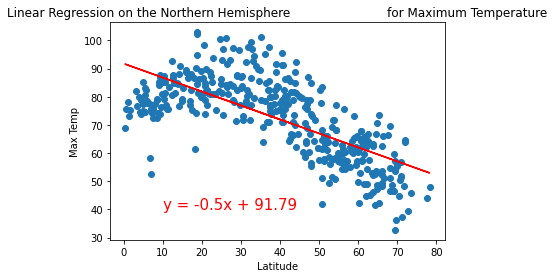

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

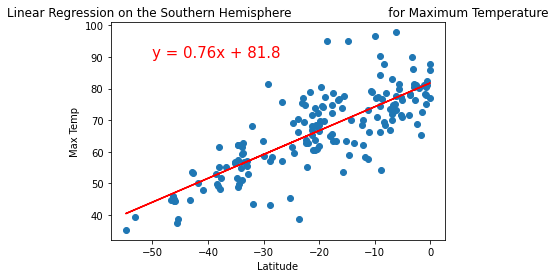

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

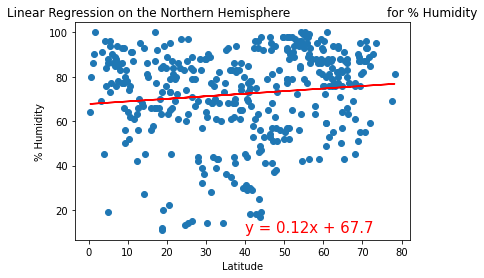

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

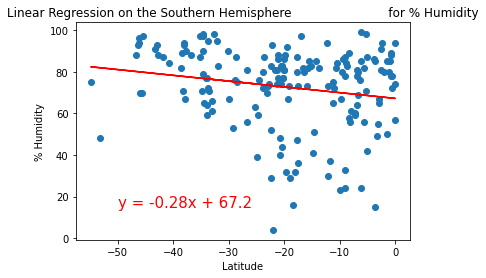

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

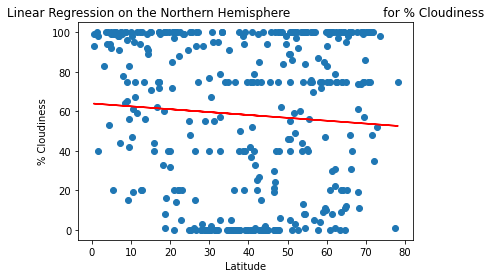

In [51]:
# Linear regression on the Northern Hemisphere and % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,15))

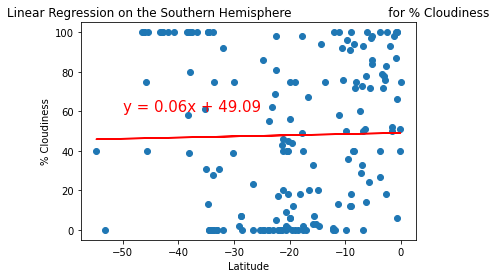

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

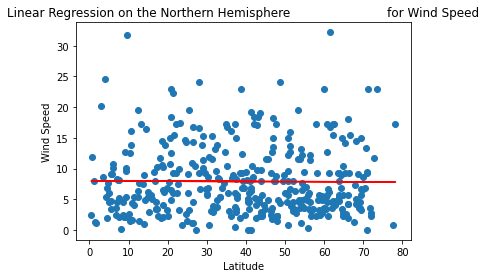

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))